In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

#Load the Data

In [3]:
tesla = pd.read_csv('Tesla_Stock.csv', index_col='Date', parse_dates=True)

In [4]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [5]:
ford = pd.read_csv('Ford_Stock.csv', index_col='Date', parse_dates=True)

In [6]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [7]:
ford.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [8]:
gm = pd.read_csv('GM_Stock.csv', index_col='Date', parse_dates=True)

In [9]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


-----------------------------------------------------------------------------

#Visualizing the Data

In [10]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


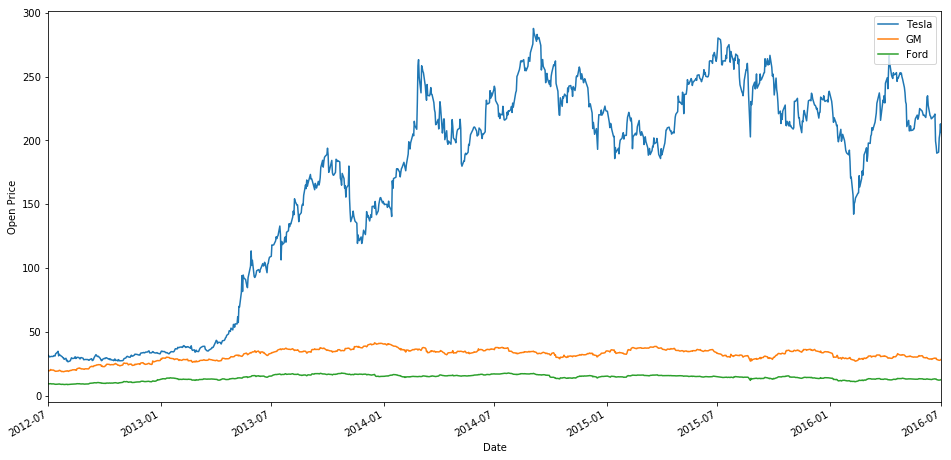

In [12]:
"""
fig = plt.figure(figsize=(16,8))
axes = fig.add_axes([0,0,1,1])

#axes.set_xlim(datetime.datetime('2012-07-01') , datetime.datetime('2016-07-01'))
#axes.set_xlim('2012-07-01' , '2016-07-01')

axes.set_title('Open Price')
axes.plot(tesla['open'], label='Tesla')
axes.plot(ford['Open'], label='Ford')
axes.plot(gm['Open'], label='GM')

axes.legend()
"""

tesla['Open'].plot.line(label='Tesla')
gm['Open'].plot.line(label='GM', figsize=(16,8), xlim=['2012-07','2016-07'])
ford['Open'].plot.line(label='Ford')

plt.ylabel('Open Price')
plt.legend(loc='upper right')


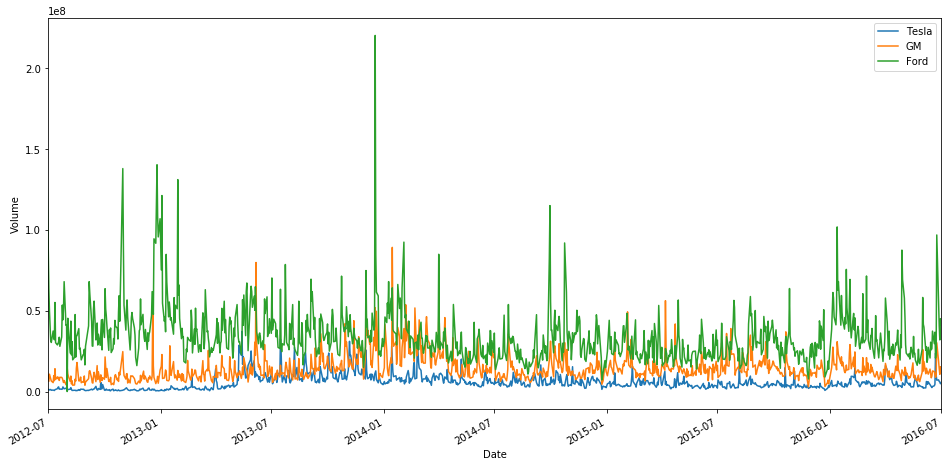

In [14]:
#the Volume of stock traded daily

tesla['Volume'].plot.line(label='Tesla')
gm['Volume'].plot.line(label='GM')
ford['Volume'].plot.line(label='Ford', figsize=(16,8), xlim=['2012-07','2016-07'])

plt.ylabel('Volume')
plt.legend(loc='upper right')

-----------------------------------------------------------------------------

In [15]:
#Get the date of the highest spike for Ford
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [16]:
#Ford has a big spike on Dec 18, 2013 because they announced the new model will cost so much that it will affect
#the profit for the next year

----------------------------------------------------------------------------

In [ ]:
# Add a new column for "Total Traded" = the Open Price multiplied by the Volume Traded.

In [17]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']

In [18]:
gm['Total Traded'] = gm['Open'] * gm['Volume']

In [19]:
ford['Total Traded'] = ford['Open'] * ford['Volume']

In [ ]:
# Plot Total Traded

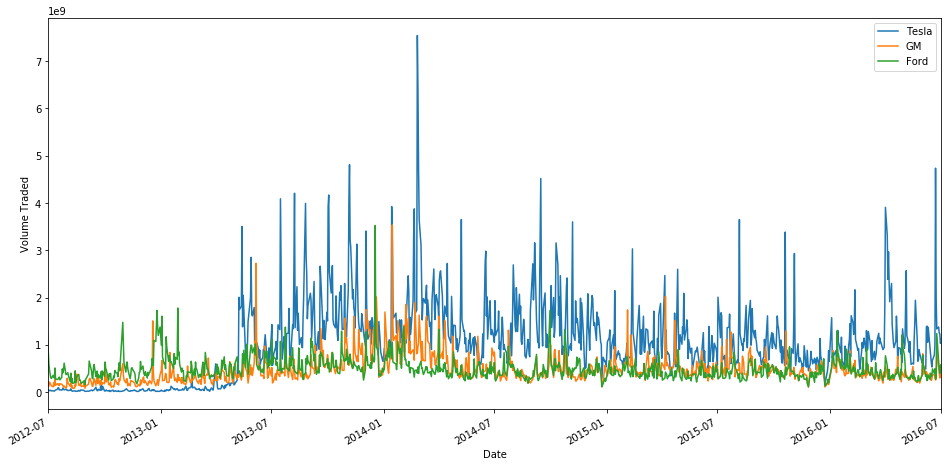

In [20]:
tesla['Total Traded'].plot.line(label='Tesla')
gm['Total Traded'].plot.line(label='GM')
ford['Total Traded'].plot.line(label='Ford', figsize=(16,8), xlim=['2012-07' , '2016-07'])

plt.ylabel('Volume Traded')
plt.legend(loc='upper right')

In [21]:
tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

In [ ]:
#On April 25, 2014, Tesla Model S was released

---------------------------------------------------------------------

In [22]:
# Moving average (rolling) for GM
gm['MA50'] = gm['Open'].rolling(window = 50).mean()
gm['MA200'] = gm['Open'].rolling(window = 200).mean()

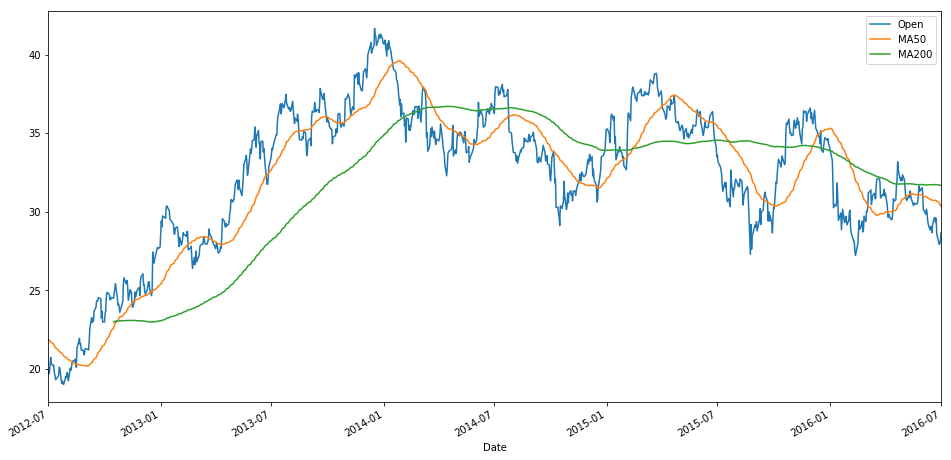

In [23]:
gm[ ['Open', 'MA50' , 'MA200'] ].plot(figsize=(16,8), xlim=['2012-07', '2016-07'])

----------------------------------------------------------------------------------

In [31]:
#Scatter matrix to compare the 3 companies
from pandas.plotting import scatter_matrix

In [32]:
#Create a new data frame to contain open prices for all companies
df_open = pd.DataFrame()

In [34]:
df_open['Tesla Open'] = tesla['Open']
df_open['GM Open'] = gm['Open']
df_open['Ford Open'] = ford['Open']

In [35]:
df_open.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC14CF8>,
      dtype=object)

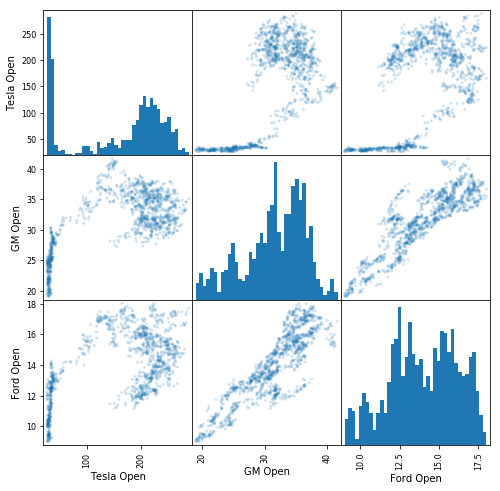

In [36]:
scatter_matrix(df_open, figsize=(8,8), alpha=0.2 ,hist_kwds={'bins':40} )

---------------------------------------------------------------------------

In [42]:
#Candle stick plot for ford data in Jan 2012
#filter the data to get data for ford in January 2012
ford_jan_2012 = ford.loc['2012-01-01' : '2012-01-31']

In [43]:
ford_jan_2012

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08
2012-01-10,12.00,12.05,11.63,11.80,121750545,1.461007e+09
2012-01-11,11.74,12.18,11.65,12.07,63806007,7.490825e+08
2012-01-12,12.16,12.18,11.89,12.14,48687666,5.920420e+08
2012-01-13,12.01,12.08,11.84,12.04,46388677,5.571280e+08


In [70]:
ford_jan_2012_reset = ford_jan_2012.reset_index()

In [71]:
ford_jan_2012_reset.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Total Traded', 'data_as_num'],
      dtype='object')

In [72]:
from matplotlib.dates import DayLocator, DateFormatter, WeekdayLocator, MONDAY, date2num
from mpl_finance import candlestick_ohlc
import matplotlib.dates

In [80]:
ford_jan_2012_reset['data_as_num'] = ford_jan_2012_reset['Date'].apply(lambda date: date2num(date))

In [81]:
ford_jan_2012_values = [tuple(vals) for vals in ford_jan_2012_reset[['data_as_num', 'Open', 'High', 'Low', 'Close']].values]

In [82]:
#Set the days, and date formatters
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

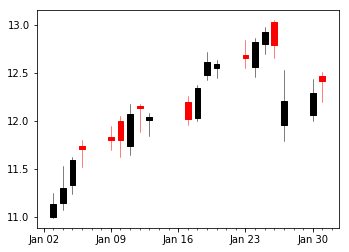

In [83]:
#Prepare the canvas and plot
fig, ax = plt.subplots()
fig.subplots_adjust(0.2)

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

#Plot the candle stick
candlestick_ohlc(ax, ford_jan_2012_values, width=0.6)


plt.show()

In [ ]:
# Daily Percentage Change

In [85]:
tesla['returns'] = tesla['Close'].pct_change(periods=1)

In [40]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [86]:
#Another way is to shift close column one day forward and use the new column for calculations
tesla['Shifted Close'] = tesla['Close'].shift(periods=1)

In [42]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Shifted Close
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,28.08
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,27.71
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,27.12
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,26.89


In [87]:
tesla['returns 2'] = (tesla['Close']/tesla['Shifted Close']) - 1

In [44]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Shifted Close,returns 2
Date,,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,28.08,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,27.71,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,27.12,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,26.89,0.013388


In [88]:
gm['returns'] = gm['Close'].pct_change(periods=1)

In [89]:
ford['returns'] = ford['Close'].pct_change(periods=1)

In [90]:
#Use a function to calculate the returns
def my_pct_change(today,prev):
    return (today/prev) - 1

tesla['returns 3'] = my_pct_change(tesla['Close'] , tesla['Shifted Close'])

In [48]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Shifted Close,returns 2,returns 3
Date,,,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,28.08,-0.013177,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,27.71,-0.021292,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,27.12,-0.008481,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,26.89,0.013388,0.013388


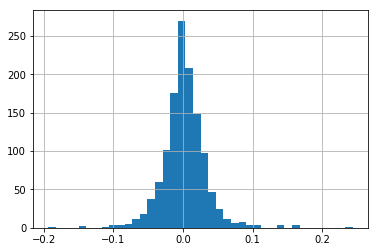

In [91]:
#Plot the hist for the returns of the 3 companies

tesla['returns'].hist(bins=40)

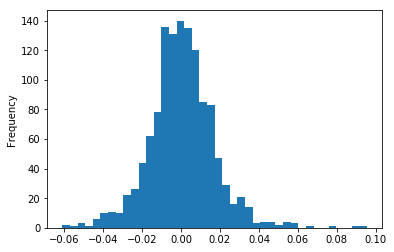

In [92]:
gm['returns'].plot.hist(bins=40)

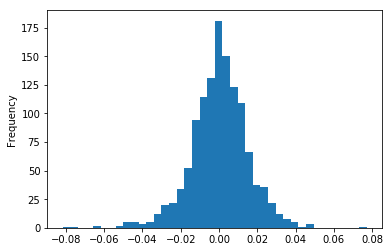

In [93]:
ford['returns'].plot(kind='hist', bins=40)

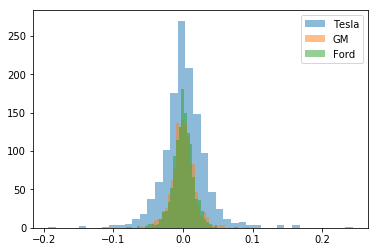

In [102]:
#Stack hist together
plt.hist(tesla['returns'], bins=40, stacked=True, label='Tesla', alpha=0.5)
plt.hist(gm['returns'], bins=40, label='GM', alpha=0.5)
plt.hist(ford['returns'], bins=40, label='Ford', alpha=0.5)

plt.legend()

plt.show()

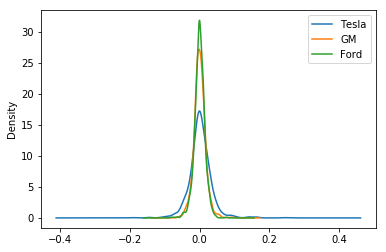

In [103]:
#KDE

tesla['returns'].plot.kde(label='Tesla')
gm['returns'].plot.kde(label='GM')
ford['returns'].plot.kde(label='Ford')

plt.legend()

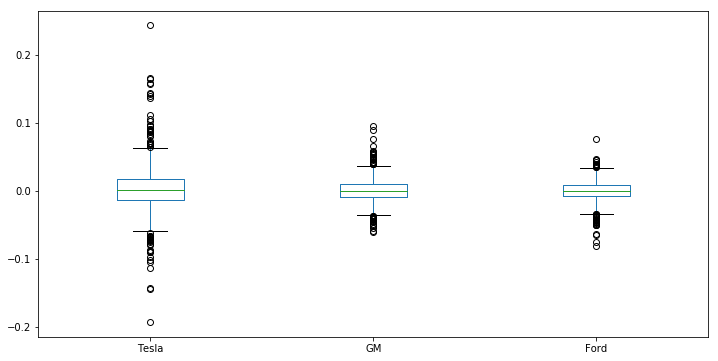

In [104]:
#Boxplots to compare the returns
df_returns = pd.DataFrame()
df_returns['Tesla'] = tesla['returns']
df_returns['GM'] = gm['returns']
df_returns['Ford'] = ford['returns']

df_returns.plot.box(figsize=(12,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DBBA6A0>,
      dtype=object)

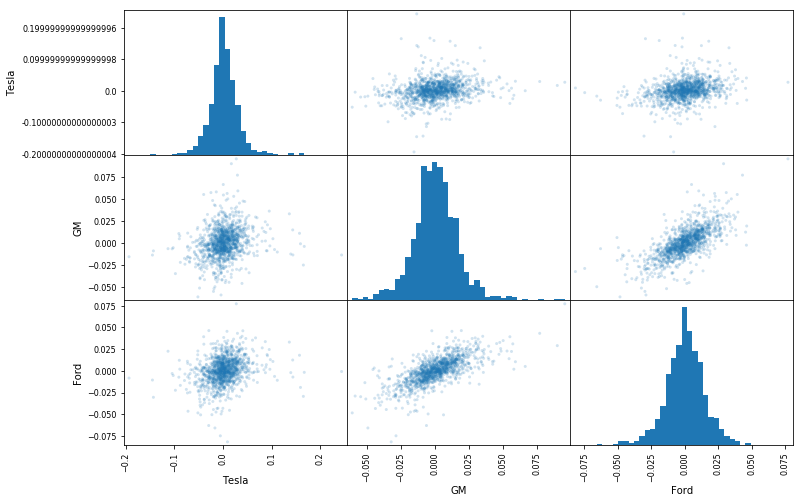

In [55]:
#Compare daily return
scatter_matrix(df_returns, alpha=0.2, figsize=(12,8), hist_kwds={'bins':40})

In [56]:
#we need to fill nan values
#df_returns.fillna(0,inplace=True)
#df_returns.head()

#OR

#drop nan values
df_returns.dropna(inplace=True)
df_returns.head()

,Tesla,GM,Ford
Date,,,
2012-01-04,-0.013177,0.004751,0.015274
2012-01-05,-0.021292,0.048227,0.025664
2012-01-06,-0.008481,0.033829,0.010354
2012-01-09,0.013388,-0.003490,0.007686
2012-01-10,0.013578,0.017513,0.000000


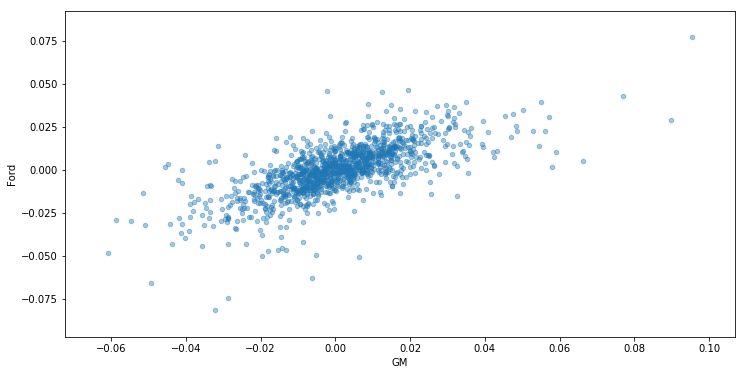

In [105]:
#Scatter plot between GM and Ford daily returns
df_returns.plot.scatter('GM', 'Ford', figsize=(12,6), alpha=0.4)

-------------------------------------------------------------------------------

In [58]:
#Cumulative daily return
tesla['Cumulative return'] = (1 + tesla['returns']).cumprod()

In [59]:
gm['Cumulative return'] = (1 + gm['returns']).cumprod()

In [60]:
ford['Cumulative return'] = (1 + ford['returns']).cumprod()

In [61]:
df_cumprod = pd.DataFrame()
df_cumprod['Tesla'] = tesla['Cumulative return']
df_cumprod['GM'] = gm['Cumulative return']
df_cumprod['Ford'] = ford['Cumulative return']

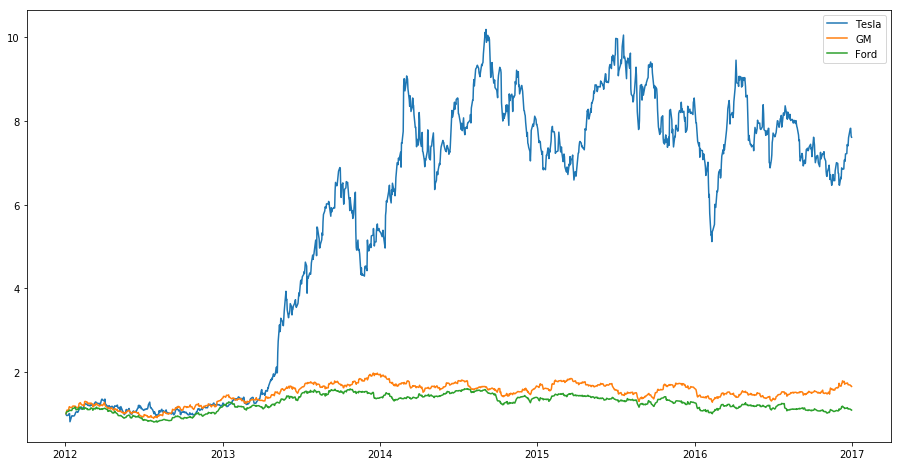

In [62]:
#Plot cumulative daily returns

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(tesla['Cumulative return'], label='Tesla')
ax.plot(gm['Cumulative return'], label='GM')
ax.plot(ford['Cumulative return'], label='Ford')

plt.legend()